# T20 WorldCup 2022 EDA Using Matplotlib.

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
T20_df=pd.read_csv('T20.csv')
T20_df.head()

,Match_id,Team_1,Team_2,Venue,Stage,Toss_winner,Toss_decision,Score_of_first_innings,Wkts_in_first_innings,Score_of_second_innings,Wkts_in_second_innings,Winner,Won_by,Player_of_the_match
0,1,Namibia,Sri Lanka,"GMHBA Stadium, South Geelong, Victoria",First Round,Sri Lanka,Field,163,7,108,10,Namibia,55 Runs,Jan Frylinck
1,2,UAE,Netherlands,"GMHBA Stadium, South Geelong, Victoria",First Round,UAE,Bat,111,8,112,7,Netherlands,3 Wickets,Bas de Leede
2,3,Scotland,West Indies,"Bellerive Oval, Hobart",First Round,West Indies,Field,160,5,118,10,Scotland,42 Runs,George Munsey
3,4,Zimbave,Ireland,"Bellerive Oval, Hobart",First Round,Ireland,Field,174,7,143,9,Zimbave,31 Runs,Sikandar Raza
4,5,Namibia,Netherlands,"GMHBA Stadium, South Geelong, Victoria",First Round,Namibia,Bat,121,6,122,5,Netherlands,5 Wickets,\nBas de Leede


In [3]:
T20_df.shape

(45, 14)

In [4]:
T20_df.describe()

,Match_id
count,45.000000
mean,23.000000
std,13.133926
min,1.000000
25%,12.000000
50%,23.000000
75%,34.000000
max,45.000000


In [5]:
T20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Match_id                 45 non-null     int64 
 1   Team_1                   45 non-null     object
 2   Team_2                   45 non-null     object
 3                Venue       45 non-null     object
 4   Stage                    45 non-null     object
 5   Toss_winner              45 non-null     object
 6   Toss_decision            45 non-null     object
 7   Score_of_first_innings   45 non-null     object
 8   Wkts_in_first_innings    45 non-null     object
 9   Score_of_second_innings  45 non-null     object
 10  Wkts_in_second_innings   45 non-null     object
 11  Winner                   45 non-null     object
 12  Won_by                   45 non-null     object
 13  Player_of_the_match      45 non-null     object
dtypes: int64(1), object(13)
memory usage: 5.0+ K

In [6]:
T20_df.isnull().sum()

Match_id                   0
Team_1                     0
Team_2                     0
             Venue         0
Stage                      0
Toss_winner                0
Toss_decision              0
Score_of_first_innings     0
Wkts_in_first_innings      0
Score_of_second_innings    0
Wkts_in_second_innings     0
Winner                     0
Won_by                     0
Player_of_the_match        0
dtype: int64

In [7]:
T20_df.columns

Index(['Match_id', 'Team_1', 'Team_2', '             Venue', 'Stage',
       'Toss_winner', 'Toss_decision', 'Score_of_first_innings',
       'Wkts_in_first_innings', 'Score_of_second_innings',
       'Wkts_in_second_innings', 'Winner', 'Won_by', 'Player_of_the_match'],
      dtype='object')

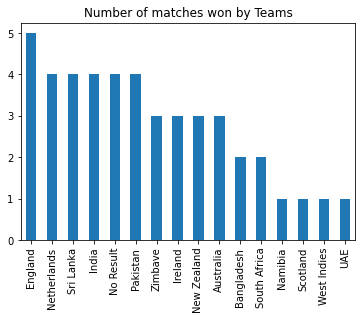

In [39]:
T20_df.Winner.value_counts().plot.bar()
plt.title('Number of matches won by Teams')
plt.show()

At the end of the tournament __England__ is leading by winning five matches overall.

In [9]:
T20_df['Won_By']=T20_df.Won_by.apply(lambda  x : x.split(' ')[1])

In [10]:
T20_df['Won_By']=T20_df['Won_By'].map({"Wickets":"Chasing","Runs":"Defending","Run":"Defending"})

In [11]:
T20_df['Won_By']=T20_df.Won_By.fillna('Draw')

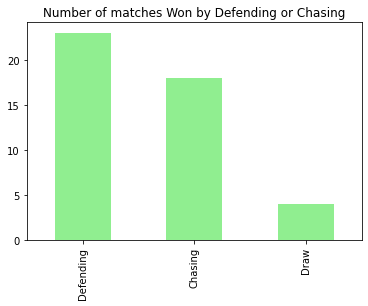

In [97]:
T20_df.Won_By.value_counts().plot(kind='bar',color='lightgreen')
plt.title('Number of matches Won by Defending or Chasing')
plt.show()

Most Number of Teams won the match by __Defending__

In [13]:
T20_df.Toss_decision.value_counts()

Bat      25
Field    17
_         3
Name: Toss_decision, dtype: int64

In [14]:
T20_df['Toss_decision']=T20_df.Toss_decision.apply(lambda x : 'Draw' if x=='_' else x)

In [15]:
T20_df.Toss_decision.value_counts()

Bat      25
Field    17
Draw      3
Name: Toss_decision, dtype: int64

In [16]:
T20_df[T20_df.Toss_decision=='Draw']

,Match_id,Team_1,Team_2,Venue,Stage,Toss_winner,Toss_decision,Score_of_first_innings,Wkts_in_first_innings,Score_of_second_innings,Wkts_in_second_innings,Winner,Won_by,Player_of_the_match,Won_By
20,21,Afghanistan,New Zealand,"Melbourne Cricket Ground, Melbourne",Group,_,Draw,_,_,_,_,No Result,No Result,_,Draw
24,25,Afghanistan,Ireland,"Melbourne Cricket Ground, Melbourne",Group,_,Draw,_,_,_,_,No Result,No Result,_,Draw
25,26,Australia,England,"Melbourne Cricket Ground, Melbourne",Group,_,Draw,_,_,_,_,No Result,No Result,_,Draw


In [17]:
T20_df['Score_of_first_innings']=T20_df.Score_of_first_innings.apply(lambda x : '0' if x=='_' else x)

In [18]:
T20_df['Score_of_first_innings']=T20_df.Score_of_first_innings.astype('int32')

In [19]:
T20_df['Score_of_second_innings']=T20_df.Score_of_second_innings.apply(lambda x : '0' if x=='_' else x)

In [20]:
T20_df['Score_of_second_innings']=T20_df.Score_of_second_innings.astype('int32')

In [21]:
T20_df['Wkts_in_first_innings']=T20_df.Wkts_in_first_innings.apply(lambda x : '0' if x=='_' else x)

In [22]:
T20_df['Wkts_in_first_innings']=T20_df.Wkts_in_first_innings.astype('int64')

In [23]:
T20_df['Wkts_in_second_innings']=T20_df.Wkts_in_second_innings.apply(lambda x : '0' if x=='_' else x)

In [24]:
T20_df['Wkts_in_second_innings']=T20_df.Wkts_in_second_innings.astype('int64')

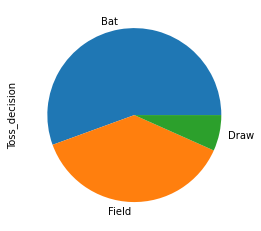

In [43]:
T20_df['Toss_decision'].value_counts().plot.pie()
plt.show()

In More than __50%__ Matches captains has choosen to __Bat__ after winning Toss

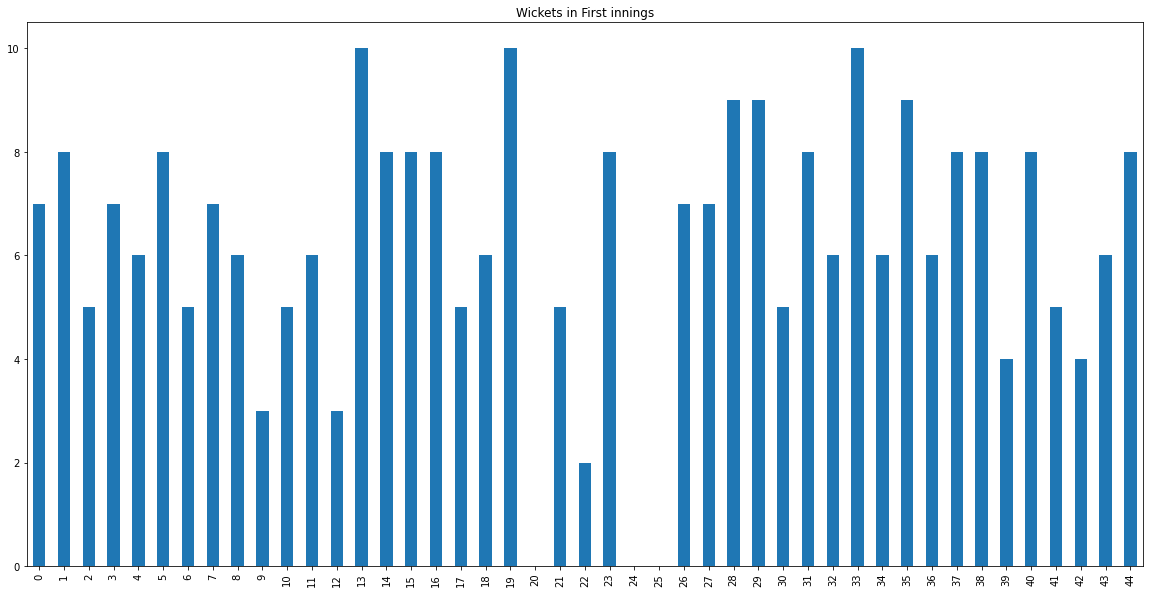

In [102]:
plt.figure(figsize=[20,10])
T20_df['Wkts_in_first_innings'].plot.bar()
plt.title('Wickets in First innings')
plt.show()

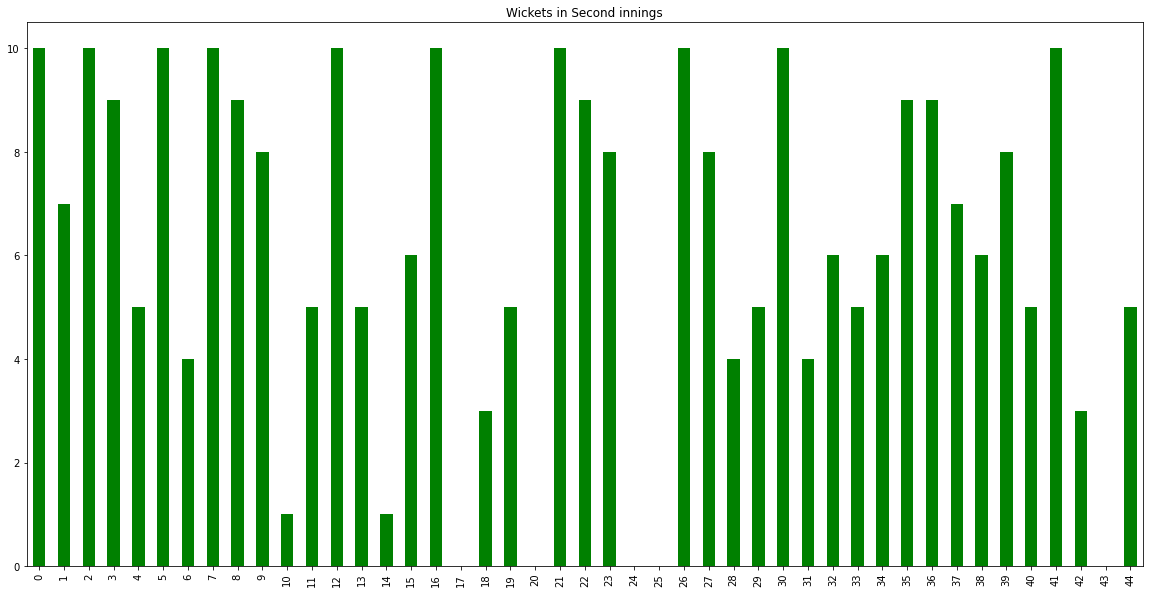

In [95]:
plt.figure(figsize=[20,10])
T20_df['Wkts_in_second_innings'].plot(kind='bar',color='green')
plt.title('Wickets in Second innings')
plt.show()

Obsevation:<br>
    The __second Innings__ has Most __All outs__.

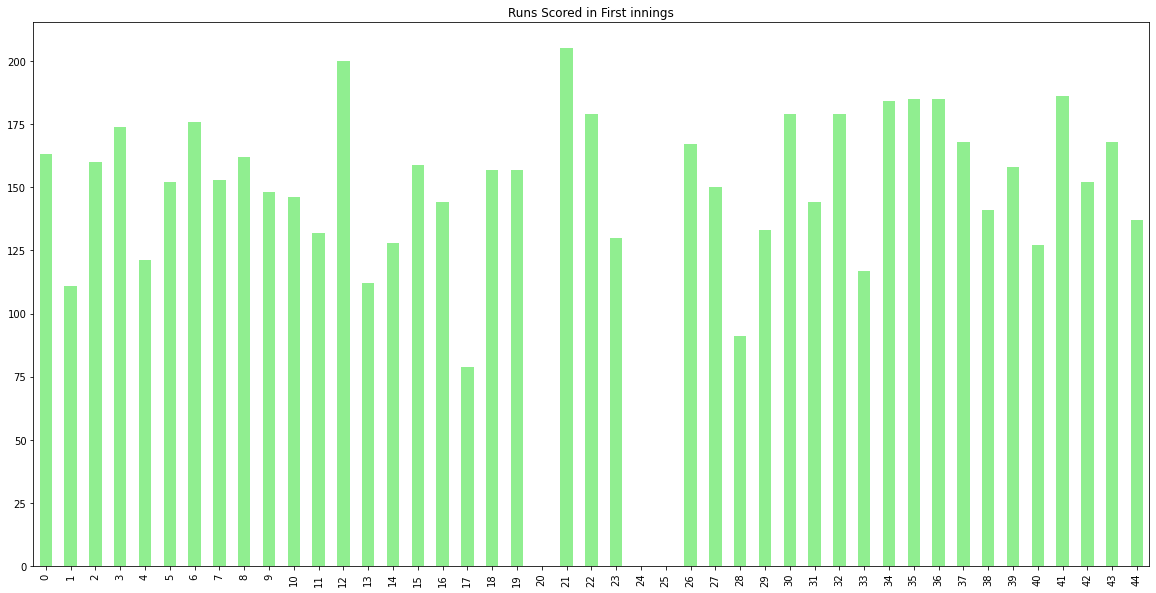

In [89]:
plt.figure(figsize=[20,10])
T20_df.Score_of_first_innings.plot(kind='bar',color='lightgreen')
plt.title('Runs Scored in First innings')
plt.show()

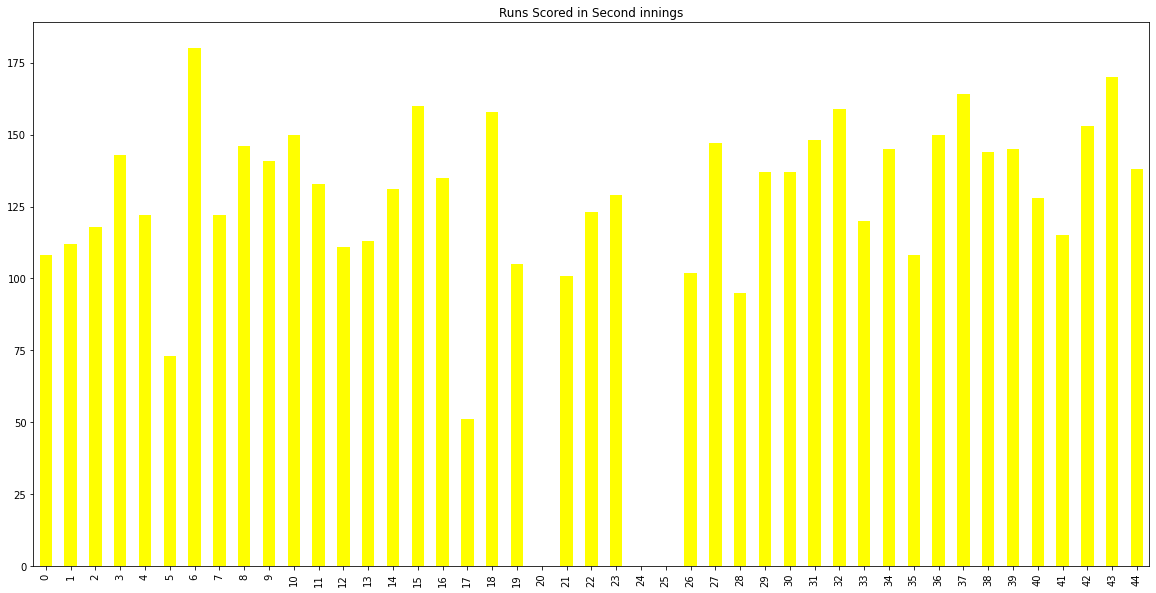

In [93]:
plt.figure(figsize=[20,10])
T20_df.Score_of_second_innings.plot(kind='bar',color='yellow')
plt.title('Runs Scored in Second innings')
plt.show()

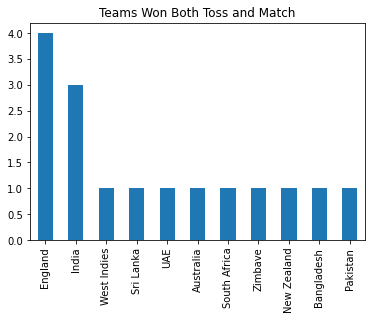

In [68]:
T20_dfw=T20_df[T20_df['Toss_winner']==T20_df['Winner']]
T20_dfw.Winner.value_counts().plot.bar()
plt.title('Teams Won Both Toss and Match')
plt.show()

__Summary:__<br>
    __England__ has won Most Number.<br>
    __Highest Score__ in first Innings was 205.<br>
    __Lowest score__ in the first Innings was 79.<br>
    __Highest Score__ in the Second Innings was 180.<br>
    __Lowest Score__ in the Second Innings was 51.<br>
    __England__ has Won Both the Toss and the Match for __4__ times.<br>
    
    